In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [43]:
df_products=pd.read_excel('products.xlsx',sheet_name='products')

In [44]:
df_products.head()

,ProductTitle
0,coconut milk
1,coconut milk
2,date milk
3,low-fat milk
4,low-fat milk


# 1.K-Means

In [45]:
corpus=df_products['ProductTitle'].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vocabs=vectorizer.get_feature_names()
count_array=X.toarray()

C:\Users\a.bayat\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
count_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
df_base=pd.DataFrame(count_array,index=df_products['ProductTitle'])

In [48]:
df_base.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
ProductTitle,,,,,,,,,,,,,,,,,,,,,
coconut milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
coconut milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
date milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
low-fat milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
low-fat milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Elbow

In [49]:
distortions = []

mapping = {}

K = range(1, 15)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_base)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(df_base, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_base.shape[0])

    mapping[k] = sum(np.min(cdist(df_base, kmeanModel.cluster_centers_,
                                'euclidean'), axis=1)) / df_base.shape[0]


C:\Users\a.bayat\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


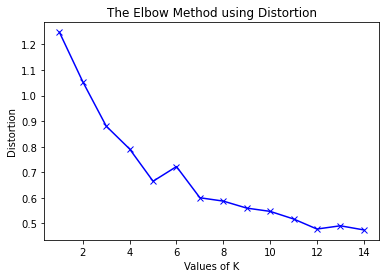

In [50]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [51]:
kmeans = KMeans(init="k-means++",
                n_clusters=6,
                n_init=10,
                max_iter=300,
                random_state=42)

In [52]:
model=kmeans.fit(df_base)

In [53]:
km_array=kmeans.labels_

In [54]:
df_base['Cluster']=km_array.tolist()
df_base.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,Cluster
ProductTitle,,,,,,,,,,,,,,,,,,,,,
coconut milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
coconut milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
date milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
low-fat milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
low-fat milk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


# The End of K-Means

# 2.Frequency-Based Algorithms

In [55]:
def divider(df):
    l=[]
    corpus=df['ProductTitle'].tolist()
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    vocabs=vectorizer.get_feature_names_out()
    count_array=X.toarray()
    freuency_array=np.sum(count_array,axis=0)
    max_ind=freuency_array.argmax()
    query=vocabs[max_ind]
    df1=df[df.ProductTitle.str.contains(query)].reset_index(drop=True)

    df0=df[~df.ProductTitle.str.contains(query)].reset_index(drop=True)
    
    df1['ProductTitle']=df1.apply(lambda row:row.ProductTitle.replace(query,''),axis=1)

    df0['ProductTitle']=df0.apply(lambda row:row.ProductTitle.replace(query,''),axis=1)
    return df0,df1,query
        

In [56]:
df_base1=df_products
#df_base1['IsIn']=1
l0=df_base1.values.tolist()
l=[l0]
#l=l.append(l0)
#print(type(l0))
#print(l0)
l_query=[]
for i in range(4):
    new_l=[0 for x in range(len(l)*2)]
    l_sub_query=[]
    for each in l:
        
        dfs = [[f"df{i}{y}"] for y in range(2)]
        df_each=pd.DataFrame(each,columns=['ProductTitle'])
        df_each=df_each.dropna()
        try:
            dfs[0],dfs[1],query=divider(df_each)
        except:
            dfs[0]=pd.DataFrame(['EmptyVocab'],columns=['ProductTitle'])
            dfs[1]=pd.DataFrame(['EmptyVocab'],columns=['ProductTitle'])
            query='EmptyVocab'
        l_sub_query.append(query)

        ind=l.index(each)
        if len(dfs[0])>0:
            new_l[2*ind]=dfs[0].values.tolist()
        else:
            new_l[2*ind]=[['EmptyVocab']]
        if len(dfs[1])>0:
            new_l[(2*ind)+1]=dfs[1].values.tolist()
        else:
            new_l[(2*ind)+1]=[['EmptyVocab']]
    l_query.append(l_sub_query)
    l=new_l

        
print(l_query)
    

[['milk'], ['shirmoz', 'fat'], ['emptyvocab', 'faradama', 'chocolate', 'low'], ['emptyvocab', 'emptyvocab', 'kum', 'EmptyVocab', 'semi', 'EmptyVocab', 'full', 'vitamin']]
